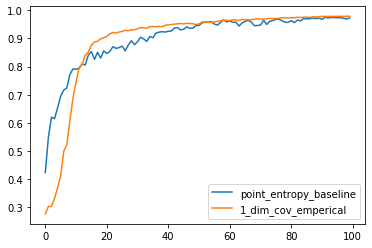

In [4]:
# result1: optim.Adam(params, lr=0.0005)
# result2: optim.Adam(params, lr=0.0001)
# result3: optim.RMSprop(params, lr=0.0001)
# result4: optim.Adam(params, lr=0.00005)
# result5: optim.Adam(params, lr=0.0002)
# result6: optim.Adam(params, lr=0.00001)
# result7: optim.Adam(params, lr=0.00003)
# result8: optim.Adam(params, lr=0.00003)
# result9: linear decay
# result10: emperical entropy, lr=0.00005
# result11: emperical entropy, lr=0.00003
# result12: emperical entropy, lr=0.00003
# result13: emperical entropy, lr=0.00004
# result14: 10 dim covariance batch,adam 0.00003
# result15: 1 dim covariance batch 0.00003
# result16: 1 dim emperical 0.00003
# result17: 10 dim emperical 0.0003
# result18: 10 dim emperical 0.00003
# result19: 10 dim emperical 0.00003_2
# result20: 10 dim lr change

import matplotlib.pyplot as plt
import numpy as np
random=[0.4313, 0.5637, 0.6809, 0.6831, 0.7159, 0.7351, 0.7326, 0.754, 0.8075, 0.8023, 0.8173, 0.8105, 0.8206, 0.8171, 0.8389, 0.8392, 0.8593, 0.8621, 0.8541, 0.8635, 0.8665, 0.8712, 0.8681, 0.8763, 0.8795, 0.8813, 0.8904, 0.9025, 0.9036, 0.8983, 0.9004, 0.8996, 0.9007, 0.904, 0.9057, 0.9074, 0.9094, 0.9088, 0.9023, 0.9054, 0.904, 0.9048, 0.9092, 0.9125, 0.9079, 0.9118, 0.9136, 0.9089, 0.9071, 0.9099, 0.9158, 0.9205, 0.9194, 0.9205, 0.9173, 0.9188, 0.9157, 0.9172, 0.9218, 0.9258, 0.9222, 0.9257, 0.9134, 0.9142, 0.9177, 0.9325, 0.9269, 0.92, 0.9168, 0.9227, 0.9206, 0.9331, 0.9284, 0.9295, 0.9283, 0.9337, 0.9262, 0.9223, 0.9319, 0.9317, 0.9255, 0.9276, 0.9221, 0.9233, 0.9322, 0.9326, 0.9331, 0.9378, 0.9316, 0.9362, 0.9382, 0.9297, 0.9318, 0.93, 0.9302, 0.9325, 0.9357, 0.9373, 0.9338, 0.9363]
# baseline=[0.1135, 0.1135, 0.1135, 0.183, 0.2036, 0.1261, 0.0987, 0.098, 0.098, 0.0988, 0.1203, 0.1775, 0.1271, 0.1828, 0.1395, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.208, 0.21, 0.2073, 0.2108, 0.2103, 0.2071, 0.2073, 0.2077, 0.2094, 0.2083, 0.2069, 0.2098, 0.2768, 0.2764, 0.2894, 0.3262, 0.3419, 0.3481, 0.3496, 0.3519, 0.3718, 0.3815, 0.3917, 0.4059, 0.4603, 0.4806, 0.505, 0.5583, 0.5821, 0.6097, 0.6617, 0.6953, 0.7085, 0.7461, 0.7587, 0.7906, 0.8233, 0.8215, 0.8658, 0.882, 0.8895, 0.9049, 0.9086, 0.9122, 0.9248, 0.9266, 0.9311, 0.9328, 0.9359, 0.9393, 0.9403, 0.945, 0.9483, 0.9438, 0.9424, 0.9474, 0.9496, 0.9504, 0.9496, 0.9525, 0.9524, 0.9547, 0.9553, 0.9553, 0.9564, 0.9572, 0.9593, 0.9585, 0.9584, 0.9606, 0.9599, 0.9628, 0.9654, 0.9658, 0.9649, 0.9655, 0.9635, 0.9654, 0.9689, 0.9687]
baseline2=[0.4676, 0.5015, 0.5661, 0.6652, 0.7014, 0.7758, 0.7854, 0.7702, 0.7715, 0.7829, 0.821, 0.8202, 0.8653, 0.8849, 0.8894, 0.8919, 0.9098, 0.9048, 0.9175, 0.9206, 0.909, 0.9054, 0.9049, 0.9149, 0.9168, 0.9198, 0.9255, 0.9243, 0.924, 0.9267, 0.9371, 0.9381, 0.9484, 0.9437, 0.9455, 0.9489, 0.9402, 0.9362, 0.9428, 0.9434, 0.9433, 0.943, 0.9503, 0.9485, 0.9429, 0.9492, 0.9488, 0.9509, 0.9493, 0.9493, 0.9532, 0.9356, 0.9569, 0.9546, 0.9543, 0.9553, 0.9565, 0.9587, 0.9594, 0.9617, 0.9641, 0.9625, 0.9631, 0.9617, 0.9631, 0.9655, 0.9639, 0.9661, 0.9603, 0.9681, 0.9637, 0.9671, 0.9681, 0.9644, 0.9601, 0.9651, 0.9651, 0.9681, 0.962, 0.9689, 0.9684, 0.9717, 0.9731, 0.9693, 0.9707, 0.9717, 0.9737, 0.9745, 0.9741, 0.9712, 0.9713, 0.9729, 0.9713, 0.9717, 0.9725, 0.9706, 0.9736, 0.9723, 0.9718, 0.974]
baseline=[0.4232, 0.5475, 0.6198, 0.6148, 0.6528, 0.695, 0.7166, 0.724, 0.7723, 0.7914, 0.7906, 0.7939, 0.8093, 0.8056, 0.8413, 0.853, 0.8258, 0.8508, 0.8302, 0.8554, 0.8467, 0.8538, 0.8707, 0.8647, 0.8673, 0.8729, 0.8559, 0.8765, 0.8918, 0.8778, 0.8886, 0.9042, 0.8987, 0.8892, 0.9071, 0.9021, 0.9191, 0.9223, 0.9241, 0.9226, 0.9255, 0.9263, 0.9369, 0.9386, 0.9303, 0.9325, 0.9415, 0.9356, 0.9366, 0.9457, 0.9461, 0.9554, 0.9577, 0.9576, 0.9591, 0.9509, 0.9474, 0.957, 0.966, 0.9589, 0.9616, 0.9573, 0.9577, 0.9442, 0.9548, 0.9607, 0.9639, 0.9584, 0.9452, 0.9461, 0.9475, 0.9646, 0.9498, 0.9607, 0.9635, 0.968, 0.968, 0.9628, 0.9576, 0.9572, 0.9634, 0.9563, 0.9653, 0.9628, 0.9702, 0.9697, 0.9702, 0.9721, 0.9705, 0.9726, 0.9676, 0.9757, 0.9728, 0.9747, 0.9743, 0.9737, 0.974, 0.9716, 0.9691, 0.9731]
result1=[0.299, 0.5047, 0.6203, 0.6707, 0.7469, 0.7589, 0.7715, 0.7893, 0.8017, 0.8184, 0.7997, 0.8235, 0.8389, 0.8448, 0.8525, 0.8541, 0.8748, 0.8732, 0.8725, 0.8768, 0.8911, 0.8916, 0.8755, 0.8774, 0.8833, 0.8986, 0.9011, 0.9009, 0.9089, 0.8991, 0.889, 0.8976, 0.8954, 0.8938, 0.9004, 0.9051, 0.9095, 0.9233, 0.9157, 0.9155, 0.9306, 0.9201, 0.928, 0.9237, 0.9232, 0.9198, 0.9203, 0.9209, 0.9165, 0.9165, 0.9087, 0.9157, 0.9171, 0.9166, 0.9236, 0.9213, 0.9174, 0.9239, 0.9218, 0.9107, 0.9088, 0.9098, 0.9121, 0.9186, 0.9082, 0.9094, 0.9111, 0.901, 0.9014, 0.8961, 0.9109, 0.897, 0.9102, 0.9093, 0.9077, 0.9117, 0.9149, 0.9016, 0.9022, 0.9139, 0.9138, 0.9145, 0.9104, 0.9143, 0.9227, 0.9175, 0.9123, 0.9105, 0.9143, 0.9121, 0.9023, 0.9019, 0.9086, 0.9092, 0.9093, 0.9132, 0.9164, 0.9146, 0.9188, 0.9161]
result2=[0.2816, 0.3265, 0.4295, 0.5692, 0.6242, 0.6918, 0.7167, 0.7474, 0.8005, 0.8111, 0.8302, 0.8241, 0.8134, 0.8201, 0.8222, 0.8363, 0.85, 0.8668, 0.8829, 0.8771, 0.8924, 0.8913, 0.9017, 0.9062, 0.9015, 0.9034, 0.9127, 0.9146, 0.9239, 0.921, 0.9321, 0.9315, 0.9359, 0.9368, 0.9374, 0.9347, 0.9385, 0.9386, 0.941, 0.9409, 0.9432, 0.9437, 0.9397, 0.9423, 0.9435, 0.9464, 0.9495, 0.9485, 0.9489, 0.9445, 0.947, 0.9493, 0.946, 0.9439, 0.9496, 0.9436, 0.9436, 0.9395, 0.9483, 0.9423, 0.9458, 0.9486, 0.9471, 0.9491, 0.938, 0.9539, 0.9538, 0.9537, 0.9537, 0.9548, 0.9594, 0.955, 0.9595, 0.9477, 0.9558, 0.956, 0.9568, 0.9558, 0.9578, 0.9573, 0.9511, 0.9598, 0.9551, 0.9577, 0.9649, 0.9609, 0.9628, 0.9588, 0.9544, 0.9576, 0.9431, 0.9589, 0.959, 0.9592, 0.9516, 0.9586, 0.9547, 0.9589, 0.9594, 0.9578]
result3=[0.2705, 0.3098, 0.3792, 0.501, 0.6223, 0.6668, 0.7061, 0.7273, 0.7303, 0.8124, 0.818, 0.8258, 0.8219, 0.8364, 0.8592, 0.8654, 0.8705, 0.8774, 0.8787, 0.8676, 0.8954, 0.9031, 0.8974, 0.9001, 0.8962, 0.8981, 0.8977, 0.9012, 0.9074, 0.9155, 0.9114, 0.9055, 0.912, 0.911, 0.9183, 0.9053, 0.9135, 0.9086, 0.9049, 0.9099, 0.9195, 0.9232, 0.8967, 0.9164, 0.9265, 0.909, 0.9191, 0.9186, 0.912, 0.9216, 0.909, 0.9061, 0.9007, 0.9176, 0.9263, 0.9192, 0.9208, 0.9048, 0.9055, 0.9201, 0.9161, 0.9174, 0.9236, 0.9379, 0.9303, 0.9301, 0.9195, 0.9269, 0.9388, 0.932, 0.9348, 0.912, 0.9291, 0.9248, 0.9178, 0.9309, 0.9443, 0.923, 0.9196, 0.9394, 0.9405, 0.931, 0.9416, 0.9405, 0.9366, 0.935, 0.949, 0.9407, 0.9324, 0.9363, 0.9302, 0.9437, 0.9386, 0.9346, 0.9379, 0.9404, 0.9382, 0.9427, 0.948, 0.9468]
result4=[0.2353, 0.3352, 0.32, 0.3577, 0.398, 0.4493, 0.5477, 0.6227, 0.6688, 0.695, 0.7214, 0.7425, 0.7311, 0.7606, 0.7812, 0.7957, 0.8313, 0.8524, 0.8498, 0.8494, 0.8412, 0.8628, 0.8592, 0.854, 0.8527, 0.884, 0.8857, 0.8884, 0.9003, 0.9071, 0.9071, 0.914, 0.9201, 0.922, 0.9223, 0.9263, 0.9319, 0.934, 0.9357, 0.9431, 0.9434, 0.9473, 0.9482, 0.9467, 0.9484, 0.952, 0.9501, 0.9501, 0.9506, 0.9529, 0.9526, 0.9561, 0.9553, 0.954, 0.9585, 0.9566, 0.958, 0.959, 0.9536, 0.9576, 0.9497,0.9619, 0.9551, 0.9537, 0.9623, 0.9609, 0.9548, 0.961, 0.9604, 0.9573, 0.9584, 0.9645, 0.9542, 0.9608, 0.9691, 0.9618,0.9625, 0.9656, 0.9638, 0.9666, 0.963, 0.965, 0.9656, 0.9683, 0.9634, 0.9695, 0.9672, 0.9687, 0.9686, 0.9628, 0.9701, 0.9605, 0.9649, 0.9719, 0.9688, 0.9652, 0.9707, 0.9699, 0.9699, 0.9688]
result5=[0.2872, 0.4375, 0.5536, 0.6952, 0.7547, 0.775, 0.8002, 0.7887, 0.8337, 0.8144, 0.8441, 0.8684, 0.8615, 0.8748, 0.8689, 0.8852, 0.8805, 0.8902, 0.8856, 0.8865, 0.885, 0.8941, 0.8948, 0.8941, 0.9027, 0.9125, 0.9122, 0.9109, 0.9271, 0.9059, 0.9134, 0.9163, 0.912, 0.9259, 0.9273, 0.9234, 0.9347, 0.939, 0.9366, 0.93, 0.9412, 0.9508, 0.9514, 0.9404, 0.9534, 0.9514, 0.9462, 0.9521, 0.949, 0.9487, 0.941, 0.9441, 0.9454, 0.941, 0.9512, 0.9528, 0.9464, 0.9511, 0.946, 0.9544, 0.9578, 0.9527, 0.9551, 0.9579, 0.9586, 0.9589, 0.9528, 0.9547, 0.9568, 0.9537, 0.9553, 0.9545, 0.9521, 0.9578, 0.9546, 0.954, 0.9568, 0.9613, 0.9532, 0.9592, 0.9598, 0.958, 0.9602, 0.959, 0.9536, 0.9569, 0.9539, 0.9576, 0.9624, 0.9572, 0.9617, 0.9563, 0.9562, 0.9596, 0.9623, 0.9573, 0.9502, 0.9611, 0.9575, 0.9519]
result6=[0.2153, 0.1252, 0.2409, 0.2621, 0.3516, 0.3808, 0.3985, 0.4536, 0.5073, 0.4686, 0.5416, 0.5673, 0.5981, 0.6115, 0.6244, 0.6437, 0.6345, 0.657, 0.6591, 0.6931, 0.7121, 0.7152, 0.7197, 0.7509, 0.7626, 0.7725, 0.8011, 0.8166, 0.8336, 0.8311, 0.8352, 0.8591, 0.8644, 0.8679, 0.8711, 0.8906, 0.8951, 0.8988, 0.9033, 0.9035, 0.9124, 0.9102, 0.9177, 0.9215, 0.922, 0.9232, 0.9293, 0.9299, 0.9334, 0.9345, 0.9376, 0.9397, 0.9423, 0.9448, 0.9429, 0.9444, 0.948, 0.947, 0.9481, 0.9482, 0.9531, 0.9522, 0.9539, 0.9541, 0.9533, 0.9539, 0.9555, 0.9557, 0.9547, 0.9592, 0.9575, 0.9551, 0.9564, 0.9553, 0.9563, 0.9554, 0.9569, 0.9569, 0.9568, 0.9584, 0.9581, 0.9594, 0.961, 0.9605, 0.9621, 0.9598, 0.9612, 0.9594, 0.9614, 0.9609, 0.9597, 0.9596, 0.9616, 0.9615, 0.9588, 0.9618, 0.9624, 0.958, 0.9613, 0.9633]
result7=[0.2136, 0.2198, 0.2651, 0.2969, 0.3624, 0.4234, 0.4869, 0.5629, 0.6371, 0.6567, 0.6901, 0.7073, 0.7069, 0.7099, 0.7292, 0.7485, 0.7756, 0.7861, 0.8135, 0.8151, 0.8275, 0.824, 0.8417, 0.8455, 0.8569, 0.873, 0.8798, 0.8824, 0.884, 0.8983,0.9031, 0.9051, 0.9046, 0.9146, 0.9147, 0.9114, 0.9195, 0.9134, 0.9186, 0.9198, 0.9282, 0.9156, 0.9283, 0.933, 0.9352,0.9307, 0.933, 0.9374, 0.9378, 0.9379, 0.939, 0.9413, 0.9394, 0.9434, 0.9459, 0.945, 0.9475, 0.9526, 0.9499, 0.9546, 0.96, 0.9591, 0.9587, 0.9616, 0.9611, 0.9637, 0.9651, 0.9651, 0.9627, 0.9625, 0.965, 0.9682, 0.9678, 0.9694, 0.9679, 0.9683, 0.965, 0.9648, 0.9697, 0.9692, 0.9694, 0.9684, 0.9724, 0.9715, 0.9728, 0.9727, 0.9716, 0.9731, 0.9735, 0.9739, 0.9734, 0.9737, 0.9737, 0.9747, 0.9726, 0.975, 0.9745, 0.976, 0.9762, 0.9757]
result8=[0.2553, 0.2232, 0.2489, 0.3119, 0.2955, 0.3089, 0.3313, 0.3901, 0.4423, 0.4912, 0.5041, 0.567, 0.5853, 0.6192, 0.6438, 0.6697, 0.696, 0.7412, 0.7653, 0.791, 0.7957, 0.8191, 0.8225, 0.8382, 0.8557, 0.8634, 0.8685, 0.8635, 0.8819, 0.8856,0.8862, 0.8927, 0.8938, 0.8941, 0.8999, 0.9033, 0.912, 0.9163, 0.9218, 0.9107, 0.9181, 0.9251, 0.9283, 0.9359, 0.9333,0.9306, 0.9412, 0.9385, 0.938, 0.9323, 0.9319, 0.9345, 0.9401, 0.9465, 0.9441, 0.9446, 0.9435, 0.9457, 0.9502, 0.9511,0.9505, 0.9506, 0.952, 0.9529, 0.9569, 0.9608, 0.961, 0.9581, 0.9612, 0.9611, 0.9637, 0.9657, 0.9667, 0.966, 0.9656, 0.9711, 0.9681, 0.9706, 0.9684, 0.9687, 0.9717, 0.9731, 0.9744, 0.9707, 0.9731, 0.9723, 0.9722, 0.9737, 0.9717, 0.9701, 0.9731, 0.9753, 0.9738, 0.9758, 0.9758, 0.9758, 0.9759, 0.9753, 0.9748, 0.9753]
result9=[0.2964, 0.3322, 0.482, 0.5542, 0.6172, 0.6331, 0.6755, 0.7006, 0.7198, 0.7439, 0.7598, 0.7813, 0.7812, 0.7813, 0.7891, 0.7938, 0.8002, 0.8041, 0.8009, 0.8185, 0.8389, 0.8483, 0.841, 0.8394, 0.8576, 0.8747, 0.8778, 0.8881, 0.871, 0.8692,0.8869, 0.8923, 0.8929, 0.8858, 0.8875, 0.867, 0.8912, 0.8832, 0.8802, 0.893, 0.8834, 0.8815, 0.8871, 0.8904, 0.9068, 0.8933, 0.9008, 0.9012, 0.9064, 0.9033, 0.903, 0.9008, 0.9114, 0.9092, 0.8984, 0.9045, 0.9046, 0.9033, 0.8952, 0.8979, 0.9029, 0.9134, 0.9179, 0.92, 0.9242, 0.9234, 0.9243, 0.9069, 0.9177, 0.917, 0.9192, 0.9174, 0.9083, 0.9061, 0.9003, 0.9147, 0.9154, 0.9202, 0.9143, 0.9161, 0.9134, 0.9069, 0.9061, 0.887, 0.8934, 0.9023, 0.9033, 0.9004, 0.9077, 0.9066, 0.912, 0.9169, 0.9245, 0.9213, 0.9243, 0.9217, 0.9271, 0.9298, 0.9303, 0.9278]
result10=[0.1884, 0.3075, 0.39, 0.5159, 0.5677, 0.6211, 0.6818, 0.7292, 0.7671, 0.7991, 0.8315, 0.859, 0.867, 0.888, 0.8896, 0.901, 0.9014, 0.9022, 0.9154, 0.9125, 0.9207, 0.9239, 0.9176, 0.922, 0.9247, 0.9208, 0.9169, 0.9264, 0.9357, 0.9391, 0.9441, 0.9464, 0.9458, 0.9444, 0.9432, 0.9491, 0.9502, 0.9481, 0.9512, 0.9491, 0.9545, 0.9553, 0.9569, 0.9579, 0.9604, 0.9561, 0.9569, 0.9595, 0.9604, 0.9613, 0.9617, 0.9632, 0.9626, 0.9628, 0.9644, 0.9646, 0.9629, 0.9646, 0.9632, 0.9641, 0.9647, 0.9652, 0.9661, 0.9656, 0.9641, 0.9631, 0.9647, 0.9649, 0.9673, 0.9626, 0.9658, 0.9666, 0.9653, 0.9663, 0.967, 0.9641, 0.9648, 0.965, 0.9604, 0.9633, 0.9645, 0.9634, 0.9644, 0.9669, 0.9669, 0.963, 0.965, 0.9633, 0.9628, 0.965, 0.9645, 0.9653, 0.9673, 0.9628, 0.9617, 0.9641, 0.9657, 0.9632, 0.9634, 0.9645]
result11=[0.2028, 0.2093, 0.2796, 0.2304, 0.2793, 0.3236, 0.4056, 0.5121, 0.5737, 0.6398, 0.7241,0.7794, 0.8198, 0.8337, 0.848, 0.8536, 0.8554, 0.8706, 0.8753, 0.8829, 0.9002, 0.9111, 0.9139, 0.9226, 0.9225, 0.9288, 0.9354, 0.9375, 0.9406, 0.9387, 0.9458, 0.9472, 0.947, 0.9434, 0.9441, 0.94, 0.9422, 0.951, 0.9542, 0.9545, 0.9509, 0.9533, 0.9544, 0.9535, 0.9543,0.9565, 0.9587, 0.9583, 0.9588, 0.9605, 0.9607, 0.9589, 0.9605, 0.9592, 0.9577, 0.9601, 0.9626, 0.964, 0.9642, 0.9642, 0.9658, 0.9661, 0.9678, 0.9686, 0.9691, 0.9673, 0.9687, 0.9701, 0.9685, 0.9697, 0.9696, 0.971, 0.9719, 0.9738, 0.9712, 0.9721, 0.9726, 0.9748, 0.9733, 0.9721, 0.9735, 0.9757, 0.9748, 0.975, 0.978, 0.978, 0.9755, 0.9746, 0.9752, 0.9753, 0.9762, 0.976, 0.9751, 0.9748, 0.9763, 0.9758, 0.9747, 0.9751, 0.976, 0.9752]
result12=[0.2585, 0.2812, 0.3637, 0.4483, 0.4884, 0.5737, 0.636, 0.6912, 0.7452, 0.7864, 0.8097, 0.8262, 0.8264, 0.8297, 0.8552, 0.8695, 0.8925, 0.8964, 0.9109, 0.9157, 0.92, 0.9214, 0.9237, 0.922, 0.9312, 0.9299, 0.9312, 0.937, 0.9395, 0.939, 0.9424, 0.9456, 0.9462, 0.9467, 0.9503, 0.9509, 0.9524, 0.9517, 0.9528, 0.953, 0.9534, 0.9558, 0.955, 0.957, 0.9594, 0.9587, 0.9577, 0.9602, 0.959, 0.9595, 0.9599, 0.9611, 0.9606, 0.9637, 0.9628, 0.9635, 0.9631, 0.9654, 0.9635, 0.9666, 0.9649, 0.9662, 0.9647, 0.9666, 0.9663, 0.9671, 0.9667, 0.9667, 0.967, 0.9675, 0.969, 0.9693, 0.9704, 0.9705, 0.9702, 0.9707, 0.9704, 0.9713, 0.971, 0.9727, 0.9702, 0.9703, 0.9704, 0.973, 0.9728, 0.9713, 0.9701, 0.9716, 0.9727, 0.9706, 0.9701, 0.9734, 0.9706, 0.9689, 0.97, 0.9709, 0.9707, 0.9704, 0.9729, 0.9728]
result13=[0.2711, 0.3098, 0.3862, 0.4904, 0.5474, 0.5701, 0.6323, 0.6769, 0.7009, 0.714, 0.7535, 0.7944, 0.7981, 0.8111, 0.8351, 0.85, 0.8742, 0.8732, 0.8756, 0.8832, 0.8888, 0.9028, 0.9061, 0.9083, 0.9158, 0.923, 0.9265, 0.931, 0.9327, 0.9373, 0.9383, 0.9405, 0.9403, 0.9414, 0.9417, 0.9451, 0.9456, 0.946, 0.9442, 0.9474, 0.9485, 0.9469, 0.9507, 0.9502, 0.9511, 0.954, 0.9536, 0.9551, 0.9556, 0.9568, 0.9571, 0.9572, 0.9601, 0.9574, 0.9603, 0.9614, 0.9619, 0.9612, 0.9628, 0.9628, 0.9627, 0.9622, 0.9658, 0.9644, 0.9647, 0.9665, 0.9664, 0.9673, 0.9653, 0.9675, 0.9672, 0.9678, 0.9671, 0.9668, 0.9623, 0.968, 0.97, 0.9679, 0.9698, 0.967, 0.9672, 0.9692, 0.9694, 0.9672, 0.9668, 0.968, 0.9662, 0.9659, 0.9692, 0.9665, 0.968, 0.9676, 0.9666, 0.9676, 0.966, 0.9694, 0.9673, 0.9713, 0.969, 0.9701]
result14=[0.2409, 0.2659, 0.3512, 0.3651, 0.4272, 0.4423, 0.4883, 0.5189, 0.5816, 0.6556, 0.6848, 0.721, 0.7352, 0.7576, 0.775, 0.7827, 0.8033, 0.8062, 0.828, 0.8403, 0.8497, 0.8698, 0.8671, 0.8799, 0.8797, 0.8822, 0.8883, 0.8786, 0.8897, 0.9028, 0.9059, 0.9118, 0.9077, 0.9118, 0.9096, 0.9141, 0.9182, 0.9199, 0.92, 0.9247, 0.9307, 0.9319, 0.933, 0.9347, 0.9386, 0.9376, 0.942, 0.9418, 0.9427, 0.9418, 0.9444, 0.9488, 0.9496, 0.9504, 0.9522, 0.952, 0.9534, 0.9554, 0.9555, 0.9543, 0.9561, 0.9555, 0.9583, 0.9602, 0.9587, 0.9597, 0.9597, 0.9594, 0.96, 0.9612, 0.9626, 0.9637, 0.9643, 0.9641, 0.9635, 0.9655, 0.9643, 0.9654, 0.9668, 0.9664, 0.9637, 0.9657, 0.9649, 0.9656, 0.966, 0.9673, 0.9669, 0.9685, 0.9694, 0.969, 0.9707, 0.9688, 0.9705, 0.9715, 0.969, 0.9721, 0.972, 0.9729, 0.9727, 0.9723]
result15=[0.2182, 0.2992, 0.252, 0.3631, 0.4251, 0.4526, 0.4863, 0.554, 0.6074, 0.6549, 0.6701, 0.6829, 0.6824, 0.6851, 0.6898, 0.7098, 0.7292, 0.7523, 0.7992, 0.8219, 0.8211, 0.8414, 0.8418, 0.847, 0.8446, 0.8615, 0.858, 0.8692, 0.8624, 0.8828, 0.8941, 0.9018, 0.895, 0.9023, 0.9083, 0.9125, 0.9165, 0.9124, 0.904, 0.9074, 0.9159, 0.9211, 0.9191, 0.9275, 0.919, 0.9298, 0.9294, 0.9379, 0.936, 0.9351, 0.9322, 0.939, 0.9414, 0.9497, 0.9492, 0.9508,0.9516, 0.9531, 0.952, 0.9539, 0.9576, 0.9562, 0.9569, 0.9589, 0.9604, 0.961, 0.9611, 0.9611, 0.9606, 0.9608,0.9625, 0.9589, 0.9636, 0.9632, 0.966, 0.9671, 0.967, 0.9665, 0.9649, 0.9656, 0.9676, 0.9677, 0.9685, 0.9695,0.9692, 0.9703, 0.9706, 0.9709, 0.9719, 0.9719, 0.9721, 0.9734, 0.9724, 0.9747, 0.9712, 0.975, 0.9734, 0.9746,0.9751,0.9755]
result16=[0.2762, 0.3026, 0.3028, 0.3313, 0.3688, 0.412, 0.4985, 0.5224, 0.6078, 0.6879, 0.7445, 0.7953, 0.8082, 0.8408, 0.8512, 0.8765, 0.888, 0.8896, 0.8987, 0.9022, 0.9072, 0.9161, 0.9211, 0.919, 0.9225, 0.9251, 0.9289, 0.9273, 0.9311, 0.9308, 0.9345, 0.9386, 0.938, 0.9364, 0.9421, 0.9425, 0.9413, 0.9423, 0.9419, 0.9467, 0.9481, 0.9492, 0.951, 0.9518, 0.953, 0.9517, 0.9538, 0.9529, 0.9523, 0.9493, 0.9512, 0.9584, 0.9583, 0.9576, 0.9573, 0.9585, 0.9611, 0.9628, 0.9642, 0.9642, 0.9632, 0.9665, 0.9651, 0.9637, 0.9678, 0.9665, 0.9666, 0.9668, 0.9686, 0.9698, 0.9687, 0.9686, 0.9696, 0.9716, 0.9706, 0.9708, 0.9718, 0.9734, 0.9741, 0.9725, 0.9736, 0.9736, 0.9755, 0.9744, 0.9754, 0.976, 0.9747, 0.9769, 0.9765, 0.9776, 0.9786, 0.9782, 0.978, 0.9785, 0.9783, 0.9787, 0.9786, 0.9784, 0.9788, 0.9789]
result17=[0.271, 0.4324, 0.5976, 0.6189, 0.6673, 0.6734, 0.7348, 0.7743, 0.7982, 0.8219, 0.8373, 0.8375, 0.8406, 0.8168, 0.8543, 0.871, 0.8609, 0.8696, 0.8821, 0.8808, 0.8948, 0.9049, 0.8962, 0.9059, 0.9157, 0.9049, 0.9168, 0.9197, 0.9188, 0.9308, 0.9396, 0.9311, 0.9369, 0.933, 0.9385, 0.9462, 0.9453, 0.9511, 0.9466, 0.9525, 0.9466, 0.9505, 0.9468, 0.9553, 0.9526, 0.9571, 0.9597, 0.9559, 0.9499, 0.9505, 0.953, 0.9535, 0.9519, 0.9539, 0.9484, 0.9527, 0.9507, 0.9533, 0.9485, 0.9523, 0.9567, 0.9588, 0.957, 0.9627, 0.9619, 0.9589, 0.96, 0.9582, 0.9569, 0.9615, 0.9629, 0.962, 0.9609, 0.9488, 0.9495, 0.9469, 0.949, 0.9455, 0.949, 0.9539, 0.9525, 0.9625, 0.959, 0.9539, 0.9566, 0.9585, 0.9482, 0.9506, 0.9521, 0.9519, 0.9612, 0.9521, 0.958, 0.9622, 0.9568, 0.9592, 0.9574, 0.9629, 0.9605, 0.9594]
result18=[0.2068, 0.2984, 0.3145, 0.3576, 0.4095, 0.4525, 0.5002, 0.5502, 0.5896, 0.6136, 0.653, 0.7056, 0.7363, 0.7723, 0.7937, 0.8015, 0.8151, 0.8178, 0.8338, 0.8441, 0.8647, 0.8686, 0.8756, 0.8828, 0.8912, 0.894, 0.8995, 0.9116, 0.9089, 0.9157, 0.9167, 0.9198, 0.9197, 0.9208, 0.9238, 0.9298, 0.9273, 0.9289, 0.927, 0.9303, 0.9302, 0.933, 0.9337, 0.9351, 0.9369, 0.9386, 0.9444, 0.943, 0.945, 0.9459, 0.948, 0.9455, 0.9442, 0.9476, 0.9458, 0.9498, 0.9501, 0.9506, 0.953, 0.9542, 0.9559, 0.955, 0.955, 0.9579, 0.9563, 0.957, 0.9623, 0.9598, 0.9626, 0.9628, 0.9627, 0.9641, 0.9646, 0.9625, 0.9631, 0.9617, 0.966, 0.9681, 0.9694, 0.9694, 0.9709, 0.9668, 0.9712, 0.9704, 0.9673, 0.9687, 0.97, 0.9695, 0.9709, 0.9704, 0.9678, 0.97, 0.9728, 0.9715, 0.9747, 0.9746, 0.9749, 0.9755, 0.9753, 0.9741]
result19=[0.1891, 0.1725, 0.1943, 0.2615, 0.2973, 0.374, 0.3895, 0.4054, 0.446, 0.4593, 0.4795, 0.516, 0.5851, 0.6346, 0.6924, 0.7289, 0.7805, 0.8238, 0.8431, 0.8491, 0.862, 0.8688, 0.8784, 0.9006, 0.9027, 0.8983, 0.909, 0.9062, 0.9108, 0.9082, 0.9007, 0.9115, 0.9156, 0.9129, 0.9173, 0.9193, 0.9267, 0.9277, 0.9314, 0.9317, 0.9352, 0.9383, 0.9417, 0.9382, 0.9386, 0.9448, 0.945, 0.9426, 0.9443, 0.9475, 0.9428, 0.9501, 0.949, 0.9499, 0.9533, 0.951, 0.9572, 0.9584, 0.9571, 0.9577, 0.9619, 0.9604, 0.9626, 0.9632, 0.9636, 0.9629, 0.9638, 0.9662, 0.9658, 0.9681, 0.969, 0.9688, 0.9692, 0.9701, 0.971, 0.9716, 0.9723, 0.9724, 0.9735, 0.9736, 0.9727, 0.9748, 0.9746, 0.974, 0.9736, 0.9742, 0.9749, 0.9752, 0.9757, 0.9758, 0.977, 0.9773, 0.9764, 0.9761, 0.9758, 0.9761, 0.9766, 0.975, 0.9769, 0.9771]
result20=[0.2418, 0.4485, 0.5834, 0.6188, 0.7017, 0.7442, 0.8051, 0.8366, 0.8543, 0.8652, 0.8833, 0.8779, 0.8937, 0.8946, 0.9016, 0.8998, 0.9092, 0.9194, 0.9261, 0.9315, 0.933, 0.9339, 0.9346, 0.9346, 0.9379, 0.9369, 0.9344, 0.9379, 0.9399, 0.9433,0.9381, 0.9355, 0.934, 0.9353, 0.9436, 0.938, 0.9362, 0.941, 0.947, 0.9463, 0.9493, 0.9497, 0.9479, 0.9468, 0.9444, 0.9445, 0.9493, 0.9506, 0.9534, 0.9525, 0.9535, 0.9517, 0.9534, 0.954, 0.9548, 0.9561, 0.958, 0.9567, 0.9593, 0.9581, 0.9585, 0.9578, 0.9602, 0.9598, 0.9587, 0.9606, 0.9602, 0.9603, 0.9605, 0.9618, 0.9603, 0.9625, 0.962, 0.9611, 0.9624, 0.9629, 0.9632, 0.9624, 0.9614, 0.9615, 0.9627, 0.9628, 0.9627, 0.961, 0.9616, 0.96, 0.9621, 0.9604, 0.9609, 0.9614, 0.9614, 0.9604, 0.9615, 0.9616, 0.9617, 0.9602, 0.9609, 0.9615, 0.9608, 0.9614]
plt.plot(baseline,label='point_entropy_baseline')
# plt.plot(baseline2,label='point_entropy_baseline_2')
# plt.plot(random,label='random_sampling_baseline')
# plt.plot(result1,label='diag_adam_0.0005')
# plt.plot(result2,label='diag_adam_0.0001')
# plt.plot(result3,label='diag_rmsprop_0.0001')
# plt.plot(result4,label='diag_adam_0.00005')
# plt.plot(result5,label='diag_adam_0.0002')
# plt.plot(result6,label='diag_adam_0.00001')
# plt.plot(result7,label='diag_adam_0.00003')
# plt.plot(result8,label='diag_adam_0.00003_2')
# plt.plot(result9,label='linear_decay')6
# plt.plot(result10,label='emperical_entropy_0.00005')
# plt.plot(result11,label='emperical_entropy_0.00003')
# plt.plot(result12,label='emperical_entropy_0.00003_2')
# plt.plot(result13,label='emperical_entropy_0.00004')
# plt.plot(result14,label='10_dim_cov_batch')
# plt.plot(result15,label='1_dim_cov_batch')
plt.plot(result16,label='1_dim_cov_emperical')
# plt.plot(result17,label='10_dim_cov_emperical_0.0003')
# # plt.plot(result18,label='10_dim_cov_emperical_0.00003')
# plt.plot(result19,label='10_dim_cov_emperical_0.00003_2')
# plt.plot(result20,label='10_dim_cov_lr_change')
plt.legend()
plt.show()

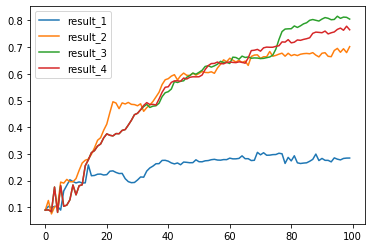

In [6]:
# result1: optim.Adam(params, lr=0.001),q_rank=10
# result2: optim.Adam(params, lr=0.0001),q_rank=10
# result3: optim.Adam(params, lr=0.00003),q_rank=10

import matplotlib.pyplot as plt
import numpy as np
result_1=[0.0892, 0.1032, 0.0982, 0.1032, 0.1032, 0.0892, 0.1611, 0.182, 0.2029, 0.1962,0.1909, 0.1948, 0.1908, 0.1912, 0.2585, 0.2179, 0.219, 0.2237, 0.2242, 0.2207, 0.222, 0.2349, 0.2362, 0.2303, 0.2262, 0.2267, 0.2068, 0.1958, 0.1919, 0.1927, 0.202, 0.2133, 0.2125, 0.2355, 0.2471, 0.2539, 0.2629, 0.2633, 0.2754, 0.2758, 0.2725, 0.2659, 0.2623, 0.2658, 0.2592, 0.2692, 0.2682, 0.2667, 0.267, 0.2777, 0.2705, 0.2702, 0.2739, 0.2748, 0.278, 0.2795, 0.2768, 0.2763, 0.2785, 0.2783, 0.2839, 0.2812, 0.2813, 0.2829, 0.2925, 0.2818, 0.2819, 0.2749, 0.2759, 0.3056, 0.2964, 0.3042, 0.2948, 0.2951, 0.2971, 0.2975, 0.3023, 0.3003, 0.2641, 0.2867, 0.2736, 0.2928, 0.2664, 0.2638, 0.2654, 0.2664, 0.2722, 0.2793, 0.2991, 0.2749, 0.2828, 0.2757, 0.2756, 0.27, 0.2849, 0.2801, 0.2773, 0.2828, 0.2841, 0.2843]
result_2=[0.0892, 0.1252, 0.0748, 0.101, 0.1052, 0.1941, 0.1902, 0.2042, 0.1954, 0.1952,0.2074, 0.238, 0.2656, 0.2761, 0.2802, 0.2982, 0.3225, 0.3508, 0.3606, 0.3887, 0.4115, 0.4547, 0.4953, 0.4905, 0.4694, 0.491, 0.487, 0.4928, 0.4856, 0.4847, 0.4803, 0.4877, 0.4594, 0.4732, 0.4832, 0.4962, 0.5133, 0.5309, 0.5598, 0.5778, 0.5818, 0.5914, 0.5968, 0.5768, 0.5927, 0.6028, 0.5945, 0.5938, 0.6022, 0.5949, 0.6013, 0.6089, 0.6053, 0.6045, 0.6077, 0.6019, 0.6219, 0.636, 0.6524, 0.6453, 0.6585, 0.6515, 0.6443, 0.6509, 0.6421, 0.6478, 0.6316, 0.6651, 0.6703, 0.6712, 0.6578, 0.6641, 0.664, 0.6838, 0.666, 0.6692, 0.6738, 0.6774, 0.6661, 0.6771, 0.668, 0.6722, 0.6685, 0.6734, 0.6756, 0.6765, 0.6752, 0.6795, 0.6701, 0.6635, 0.6772, 0.6792, 0.6657, 0.6643, 0.6875, 0.6954, 0.6809, 0.6941, 0.6796, 0.7019]
result_3=[0.0892, 0.09, 0.0833, 0.1755, 0.0805, 0.1806, 0.1034, 0.1078, 0.1277, 0.1832, 0.1464, 0.1803, 0.184, 0.2554, 0.2775,0.3044, 0.3121, 0.3291, 0.337, 0.36, 0.3749, 0.3696, 0.3673, 0.3759, 0.3755, 0.3879, 0.3911, 0.4079, 0.4257, 0.4468, 0.452, 0.4654, 0.4771, 0.4855, 0.474, 0.4787, 0.4803, 0.4898, 0.5145, 0.5291, 0.5331, 0.5431, 0.5711, 0.5675, 0.572, 0.5739, 0.587, 0.5934, 0.6028, 0.5986, 0.6056, 0.6132, 0.6276, 0.6303, 0.6252, 0.6299, 0.636, 0.6469, 0.6427, 0.6429, 0.6388, 0.6625, 0.6612, 0.6548, 0.6664, 0.6614, 0.6631, 0.6585, 0.6596, 0.6591, 0.6572, 0.658, 0.6606, 0.6631, 0.6702, 0.6928, 0.7285, 0.7584, 0.7678, 0.7687, 0.7691, 0.7795, 0.7739, 0.7799, 0.7874, 0.7915, 0.8007, 0.8036, 0.8007, 0.7979, 0.8053, 0.8109, 0.8082, 0.8028, 0.8039, 0.8159, 0.808, 0.8127, 0.8118, 0.8052]
result_4=[0.0892, 0.09, 0.0833, 0.1755, 0.0805, 0.1806, 0.1034, 0.1078, 0.1277, 0.1832, 0.1464, 0.1803, 0.184, 0.2554, 0.2775, 0.3044, 0.3121, 0.3291, 0.337, 0.36, 0.3749, 0.3696, 0.3673, 0.3759, 0.3755, 0.3879, 0.3911, 0.4079, 0.4257, 0.4468, 0.452, 0.4654, 0.4816, 0.4921,0.485, 0.4856, 0.4832, 0.5055, 0.531,0.5496, 0.5515, 0.568, 0.5736, 0.5739, 0.5721, 0.5842, 0.5805, 0.587, 0.5889, 0.5887, 0.589, 0.5954, 0.6161, 0.6308, 0.6385, 0.6391, 0.6442, 0.6384, 0.6376, 0.6428, 0.6444, 0.6428, 0.642, 0.6449, 0.6434, 0.6398, 0.6596, 0.6871,0.6885, 0.6916, 0.685, 0.6974, 0.7002, 0.6996, 0.6997, 0.7031, 0.7053, 0.7197, 0.7189, 0.7282, 0.7161, 0.7186, 0.727, 0.7256, 0.7291, 0.7317, 0.7352, 0.7518, 0.7564, 0.7554, 0.7541, 0.7603,0.7496, 0.7539, 0.7571, 0.7666, 0.7715, 0.7634, 0.7785, 0.7652]
plt.plot(result_1,label='result_1')
plt.plot(result_2,label='result_2')
plt.plot(result_3,label='result_3')
plt.plot(result_4,label='result_4')
plt.legend()
plt.show()